## Data Cleaning

### Introduction

This notebook goes through the data cleaning step of the Capstone project. Although data cleaning is a time consuming and unexciting task, its a very important one. As the saying goes, "Garbage in, garbage out". Feeding dirty data into a model will provide results that are meaningless.

Specifically, this notebook achieve to explain the following:
1. __Getting the data__ - In this case, the data have been scraped from a news website
2. __Cleaning the data__
3. __Organizing the data__ - Organizing the clean data such that it will be easy to input into other algorithms.


In [1]:
# Importing packages

import os
import re
import math
import nltk

import string
import numpy as np
import pandas as pd

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings 
warnings.filterwarnings('ignore')

import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
url = pd.read_csv("st_data.csv")
df = pd.DataFrame(url)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.shape

(7168, 7)

In [3]:
df.head()

,Headline,Publish Date,Category,Author,Author Title,Content,Tags
0,Top stories from The Straits Times on Wednesda...,"May 15, 2019, 7:15 am SGT",General,NaN,NaN,Good morning! Here are our top stories to kick...,['NEWSLETTER']
1,"ST Now, News As It Happens - May 15, 2019","May 15, 2019, 5:37 am SGT",General,NaN,NaN,"Welcome to ST Now, News As It Happens. Recap o...",['LIVE BLOG']
2,"What else, other than Sejarah Melayu, can you ...","May 15, 2019, 4:00 am SGT",General,NaN,NaN,All the talk about The First Print exhibition ...,"['ASK NLB', 'NATIONAL LIBRARY BOARD']"
3,NUS approves plans by students' union to hold ...,"May 14, 2019, 11:50 pm SGT",General,Shabana Begum,NaN,SINGAPORE - The National University of Singapo...,"['NUS', 'VOYEURS']"
4,Water management social enterprise is the firs...,"May 14, 2019, 11:15 pm SGT",General,Shabana Begum,NaN,"SINGAPORE - A local water management company, ...","['WATER CONSERVATION', 'AWARDS AND PRIZES']"


In [4]:
# Some articles on Straits Times are summary for the week which provide no relevant or valuable content
df.Content[0]

'Good morning! Here are our top stories to kick-start your Wednesday, May 15.Asian stocks were poised to track the rebound in US equities as President Donald Trump said he had an ongoing dialogue with China, assuaging some concern about the deteriorating trade war.\xa0READ MORE HEREInfections surged by more than 50 per cent to 294 cases last week, from 194 the week before.READ MORE HEREFacebook\'s WhatsApp said a security breach on its messaging app had signs of coming from a private company working on surveillance.READ MORE HEREMelissa Chan shares her story in this series on millennials who inspire us.READ MORE HEREThe move is in light of four reported cases of voyeurism on university campuses in the past three weeks.READ MORE HEREStopping smoking, a healthy diet and avoiding harmful use of alcohol were also among the recommendations of the WHO\'s report, entitled "Risk reduction of cognitive decline and dementia".READ MORE HEREBeijing is counting on vast domestic market to help it we

In [5]:
# Removing articles with summary of other articles
for i,s in enumerate(df.Content):
    if 'Good morning!' in s:
        df.drop(i,inplace=True)
        
    elif 'Welcome to ST Now' in s:
        df.drop(i,inplace=True)
        
    elif 'ST PREMIUM' in s:
        df.drop(i,inplace=True)
        
    # Regex to add a space to periods that don't already have one, but skips non-alphanumerics like commas.
    s = re.sub(r'\.(?=[^ \W\d])', '. ', s)
    # Remove weird characters
    s = s.replace(u'\xa0', u' ')
    s = s.replace('READ MORE HERE','')
    # Make all words smaller case
    s = s.lower()
        
df.reset_index(inplace=True,drop=True)
# for i,s in enumerate(df.Content):
#     if 'Welcome to ST Now' in s:
#         df.drop(i,inplace=True)
# df.reset_index(inplace=True,drop=True)

In [6]:
df.shape # Here we are left with 6830 articles

(6230, 7)

In [7]:
df.head()

,Headline,Publish Date,Category,Author,Author Title,Content,Tags
0,"What else, other than Sejarah Melayu, can you ...","May 15, 2019, 4:00 am SGT",General,NaN,NaN,All the talk about The First Print exhibition ...,"['ASK NLB', 'NATIONAL LIBRARY BOARD']"
1,NUS approves plans by students' union to hold ...,"May 14, 2019, 11:50 pm SGT",General,Shabana Begum,NaN,SINGAPORE - The National University of Singapo...,"['NUS', 'VOYEURS']"
2,Water management social enterprise is the firs...,"May 14, 2019, 11:15 pm SGT",General,Shabana Begum,NaN,"SINGAPORE - A local water management company, ...","['WATER CONSERVATION', 'AWARDS AND PRIZES']"
3,194-year-old Masjid Bencoolen to undergo $4 mi...,"May 14, 2019, 11:02 pm SGT",General,Jeanell Kiew,NaN,SINGAPORE - The 194-year-old Masjid Bencoolen ...,"['MOSQUES', 'RENOVATION', 'ISLAM']"
4,ITE student scores perfect 4.0 GPA after defe...,"May 14, 2019, 10:02 pm SGT",General,Christie Chiu,NaN,SINGAPORE - In her first year at ITE College C...,"['ITE', 'LEE KUAN YEW', 'EDUCATION AND SCHOOLS..."


In [8]:
df['Content'][0]

'All the talk about The First Print exhibition has centred on the Sejarah Melayu. There are also other gems which are worth looking at.Some of the other highlights at the exhibition include the book,\xa0Singapura dilanggar Todak (garfish attack on Singapore). We have all read about this during our school days – the famous but tragic story of the quick-witted boy who saved Singapore from a shoal of garfish.Singapura dilanggar Todak (Garfish attack on Singapore). PHOTO: NATIONAL LIBRARY BOARDCeritera ilmu kepandaian (Stories of Knowledge and Expertise)\xa0is another rare book by Munsyi Abdullah. The publication discussed 19th\xa0century European inventions and technology, like steamships and piping systems. The book was originally meant for students in Singapore but it became so popular that it was edited and romanised for government schools in the Dutch East Indies in the mid-1860s.There are plenty of other artefacts that retell the familiar local stories and legends of early Singapore 

In [9]:
# Removing the starting term for articles that have Singapore
for i,s in enumerate(df.Content):
    if s.startswith('SINGAPORE'):
        df['Content'][i] = df['Content'][i][12:]

In [10]:
df.Content.head(20)

0     All the talk about The First Print exhibition ...
1     The National University of Singapore has appro...
2     A local water management company, which made a...
3     The 194-year-old Masjid Bencoolen will undergo...
4     In her first year at ITE College Central as a ...
5     The 23 individuals who had close contact with ...
6     Three men, believed to be the masterminds behi...
7     It was not the front facade of the old Traffic...
8     An Indian national falsely accused two people ...
9     He started touching his daughter sexually when...
10    All 20 Singapore Management University (SMU) s...
11    Powered by contributions from new acquisitions...
12    A young woman was seated on the ledge on the s...
13    omemade cookies, colourful handicrafts and eve...
14    It costs more, but proton beam therapy can tar...
15    A man has been arrested for allegedly molestin...
16    A man who was seen holding what appeared to be...
17    Catch up with the hottest topics on The St

In [11]:
df.Content[2]

'A local water management company, which made a mark on dozens of villages in India, Indonesia and Hong Kong by bringing them clean drinking water and sanitation, has won an international award.Ecosoftt became the first Singapore organisation to receive the Zayed Sustainability Prize, which is awarded by the United Arab Emirates (UAE) in recognition of innovative and sustainable solutions in the areas of health, food, energy and water that benefit communities in developing countries.Founded in 2012, the social enterprise embarked on one of its first overseas projects two years later in the state of Madhya Pradesh in central India.The Narmada River, which runs through the city of Omkareshwar and was heavily polluted with sewage pouring in from over 200 drains, supports the water needs of almost 75 million people who live in the state, from agriculture to drinking, said Mr Stanley Samuel, founder and chief executive officer of Ecosoftt.He spoke to the media on Tuesday (May 14) on the sid

In [12]:
df.Category.value_counts()

Business          2476
General           1512
Courts & Crime     949
Transport          468
Health             321
Education          253
Environment        118
Manpower            77
Housing             56
Name: Category, dtype: int64

In [13]:
# Converting column to string type for cleaning
df.Content = df.Content.astype(str)

In [14]:
# Create function to clean text

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuaction'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [15]:
df1 = df.groupby('Category')['Content'].apply(','.join).reset_index()

In [16]:
# Content groupby Categories in a corpus format
df1

,Category,Content
0,Business,April saw a big pullback in launches as develo...
1,Courts & Crime,"Three men, believed to be the masterminds behi..."
2,Education,Some 600 people came together over the weekend...
3,Environment,A large waterspout was spotted off Singapore's...
4,General,All the talk about The First Print exhibition ...
5,Health,The 23 individuals who had close contact with ...
6,Housing,Home buyers can draw more from their Central P...
7,Manpower,Domestic worker Iek Saron last celebrated the ...
8,Transport,Powered by contributions from new acquisitions...


In [17]:
# Let's take a look at the updated text
df_clean = df1
df_clean.Content = pd.DataFrame(df1.Content.apply(round1))
df_clean

,Category,Content
0,Business,april saw a big pullback in launches as caut...
1,Courts & Crime,three men to be the a grabhitch payment h...
2,Education,some 600 people came together over the to sm...
3,Environment,a large waterspout was off singapores shores ...
4,General,all the talk about the first print exhibition ...
5,Health,the 23 who close contact with a nigerian man...
6,Housing,home buyers can more from their central to ...
7,Manpower,worker iek saron last the khmer new year at ...
8,Transport,by contributions from new acquisitions transp...


In [18]:
# More cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that were missed in the first round'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
round2 = lambda x: clean_text_round2(x)

In [19]:
# Let's take a look at the updated text
df_clean.Content = pd.DataFrame(df_clean.Content.apply(round2))
df_clean = df_clean.set_index('Category')

In [20]:
df_clean

,Content
Category,
Business,april saw a big pullback in launches as caut...
Courts & Crime,three men to be the a grabhitch payment h...
Education,some 600 people came together over the to sm...
Environment,a large waterspout was off singapores shores ...
General,all the talk about the first print exhibition ...
Health,the 23 who close contact with a nigerian man...
Housing,home buyers can more from their central to ...
Manpower,worker iek saron last the khmer new year at ...
Transport,by contributions from new acquisitions transp...


In [21]:
# Tokenizing words and terms

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english',token_pattern=r'\b[^\d\W]+\b', min_df=0.2, ngram_range=(1,3))
data_cv = cv.fit_transform(df_clean.Content)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = ['Business', 'Courts & Crime', 'Education', 'Environment', 'General', 'Health', 'Housing', 'Manpower', 'Transport']
data_dtm

,aa,aaron,aaron loh,aaron loh past,ab,ab karim,ab karim lives,ab karim ron,ab mutalif,ab mutalif given,...,zulkifliin waste moving,zumba,zurich,zurich airportthe,zurichbritish,zurichbritish cities,zurichbritish cities positions,½,½ years,½ years jail
Business,45,1,1,1,4,2,1,1,0,0,...,0,0,3,1,1,1,1,0,0,0
Courts & Crime,0,3,0,0,13,1,0,1,12,2,...,1,0,0,0,0,0,0,2,2,1
Education,0,9,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Environment,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
General,4,6,1,1,7,1,1,0,6,1,...,0,1,0,0,1,1,1,1,1,1
Health,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Housing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Manpower,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Transport,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0


In [22]:
data_topwords = data_dtm.transpose()
data_topwords.head()

,Business,Courts & Crime,Education,Environment,General,Health,Housing,Manpower,Transport
aa,45,0,0,0,4,0,0,0,0
aaron,1,3,9,0,6,0,0,0,0
aaron loh,1,0,0,0,1,0,0,0,0
aaron loh past,1,0,0,0,1,0,0,0,0
ab,4,13,0,0,7,0,0,0,0


In [23]:
# Find the top 30 words in each category
top_dict = {}
for c in data_topwords.columns:
    top = data_topwords[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Business': [('cent', 8607),
  ('million', 4406),
  ('year', 3460),
  ('singapore', 2862),
  ('company', 2459),
  ('new', 2423),
  ('billion', 2032),
  ('shares', 2000),
  ('market', 1979),
  ('group', 1731),
  ('growth', 1639),
  ('business', 1566),
  ('financial', 1443),
  ('mr', 1419),
  ('global', 1327),
  ('china', 1297),
  ('quarter', 1225),
  ('march', 1209),
  ('companies', 1176),
  ('bank', 1154),
  ('investment', 1104),
  ('years', 1077),
  ('share', 1070),
  ('net', 1035),
  ('capital', 952),
  ('investors', 943),
  ('cents', 898),
  ('chief', 896),
  ('april', 883),
  ('markets', 879)],
 'Courts & Crime': [('court', 1705),
  ('police', 1519),
  ('mr', 1154),
  ('man', 1063),
  ('years', 994),
  ('singapore', 928),
  ('year', 838),
  ('public', 775),
  ('guilty', 650),
  ('later', 648),
  ('jail', 617),
  ('ms', 610),
  ('victim', 596),
  ('woman', 531),
  ('months', 526),
  ('case', 512),
  ('tan', 475),
  ('offences', 457),
  ('money', 428),
  ('prosecutor', 401),
  ('apr

In [24]:
# Print the top 15 words in each category
for category, top_words in top_dict.items():
    print(category)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Business
cent, million, year, singapore, company, new, billion, shares, market, group, growth, business, financial, mr
---
Courts & Crime
court, police, mr, man, years, singapore, year, public, guilty, later, jail, ms, victim, woman
---
Education
school, university, singapore, schools, year, mr, years, new, nus, cent, programme, time, support, work
---
Environment
singapore, water, mr, environment, year, waste, national, public, cent, nea, agency, new, plastic, park
---
General
singapore, mr, new, year, people, years, police, public, minister, time, cent, times, help, national
---
Health
health, patients, singapore, cent, people, hospital, year, new, healthcare, cancer, mr, care, public, national
---
Housing
flats, flat, year, housing, cent, years, resale, cpf, buyers, lease, new, prices, mr, months
---
Manpower
workers, year, work, cent, singapore, mr, employers, new, labour, employment, companies, skills, years, manpower
---
Transport
singapore, transport, new, lta, bus, year, mr, pu

__NOTE__: At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [25]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each category
words = []
for category in data_topwords.columns:
    top = [word for (word, count) in top_dict[category]]
    for t in top:
        words.append(t)
        
words

['cent',
 'million',
 'year',
 'singapore',
 'company',
 'new',
 'billion',
 'shares',
 'market',
 'group',
 'growth',
 'business',
 'financial',
 'mr',
 'global',
 'china',
 'quarter',
 'march',
 'companies',
 'bank',
 'investment',
 'years',
 'share',
 'net',
 'capital',
 'investors',
 'cents',
 'chief',
 'april',
 'markets',
 'court',
 'police',
 'mr',
 'man',
 'years',
 'singapore',
 'year',
 'public',
 'guilty',
 'later',
 'jail',
 'ms',
 'victim',
 'woman',
 'months',
 'case',
 'tan',
 'offences',
 'money',
 'prosecutor',
 'april',
 'public prosecutor',
 'officers',
 'charges',
 'victims',
 'left',
 'march',
 'taken',
 'lim',
 'statement',
 'school',
 'university',
 'singapore',
 'schools',
 'year',
 'mr',
 'years',
 'new',
 'nus',
 'cent',
 'programme',
 'time',
 'support',
 'work',
 'learning',
 'social',
 'ong',
 'parents',
 'help',
 'primary',
 'national',
 'subjects',
 'like',
 'moe',
 'early',
 'minister',
 'sexual',
 'ministry',
 'polytechnic',
 'normal',
 'singapore',
 'w

In [26]:
Counter(words).most_common()[:10]

[('year', 9),
 ('mr', 9),
 ('cent', 8),
 ('singapore', 8),
 ('new', 8),
 ('years', 8),
 ('public', 6),
 ('help', 6),
 ('national', 5),
 ('time', 4)]

In [27]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count >= 4]
add_stop_words

['year',
 'mr',
 'cent',
 'singapore',
 'new',
 'years',
 'public',
 'help',
 'national',
 'time',
 'people']

In [28]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df_clean.Content)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = df_clean.index

In [29]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

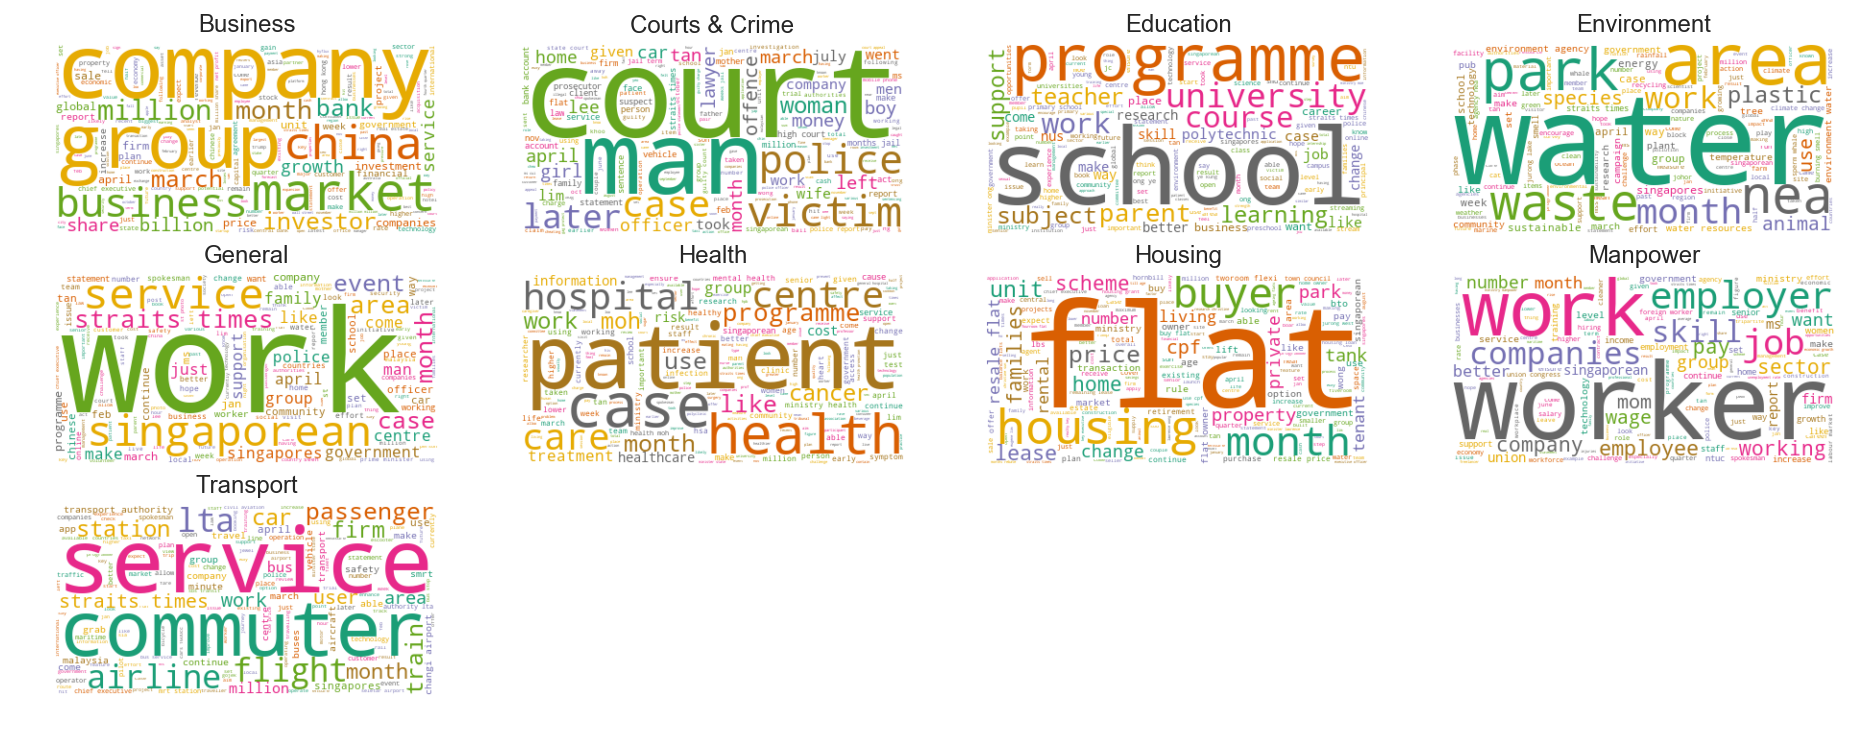

In [30]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

Categories = ['Business', 'Courts & Crime', 'Education', 'Environment', 'General', 'Health', 'Housing', 'Manpower', 'Transport']

# Create subplots for each comedian
for index, category in enumerate(data_topwords.columns):
    wc.generate(df_clean.Content[category])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(Categories[index])
    
plt.show()

In [31]:
# Find the number of unique words that each category contains

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for category in data_topwords.columns:
    uniques = data_topwords[category].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(Categories, unique_list)), columns=['category', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words',ascending=False)
data_unique_sort

,category,unique_words
4,General,129560
0,Business,105406
1,Courts & Crime,66275
8,Transport,40924
5,Health,36746
2,Education,25712
3,Environment,15464
7,Manpower,12153
6,Housing,8346


In [32]:
# Calculate the words per article of each category

# Find the total number of words that a category contains
total_list = []
for category in data_topwords.columns:
    totals = sum(data_topwords[category])
    total_list.append(totals)
    
# Category article count in respective order
article_word_count = [2549, 1010, 335, 136, 1978, 402, 66, 99, 598]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['article_word_count'] = article_word_count
data_words['words_per_article'] = data_words['total_words'] / data_words['article_word_count']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpa_sort = data_words.sort_values(by='words_per_article')
data_wpa_sort

,category,unique_words,total_words,article_word_count,words_per_article
0,Business,105406,512634,2549,201.111809
4,General,129560,402267,1978,203.370576
8,Transport,40924,123542,598,206.591973
2,Education,25712,77088,335,230.113433
1,Courts & Crime,66275,237300,1010,234.950495
5,Health,36746,98913,402,246.052239
3,Environment,15464,35571,136,261.551471
6,Housing,8346,17780,66,269.393939
7,Manpower,12153,27531,99,278.090909


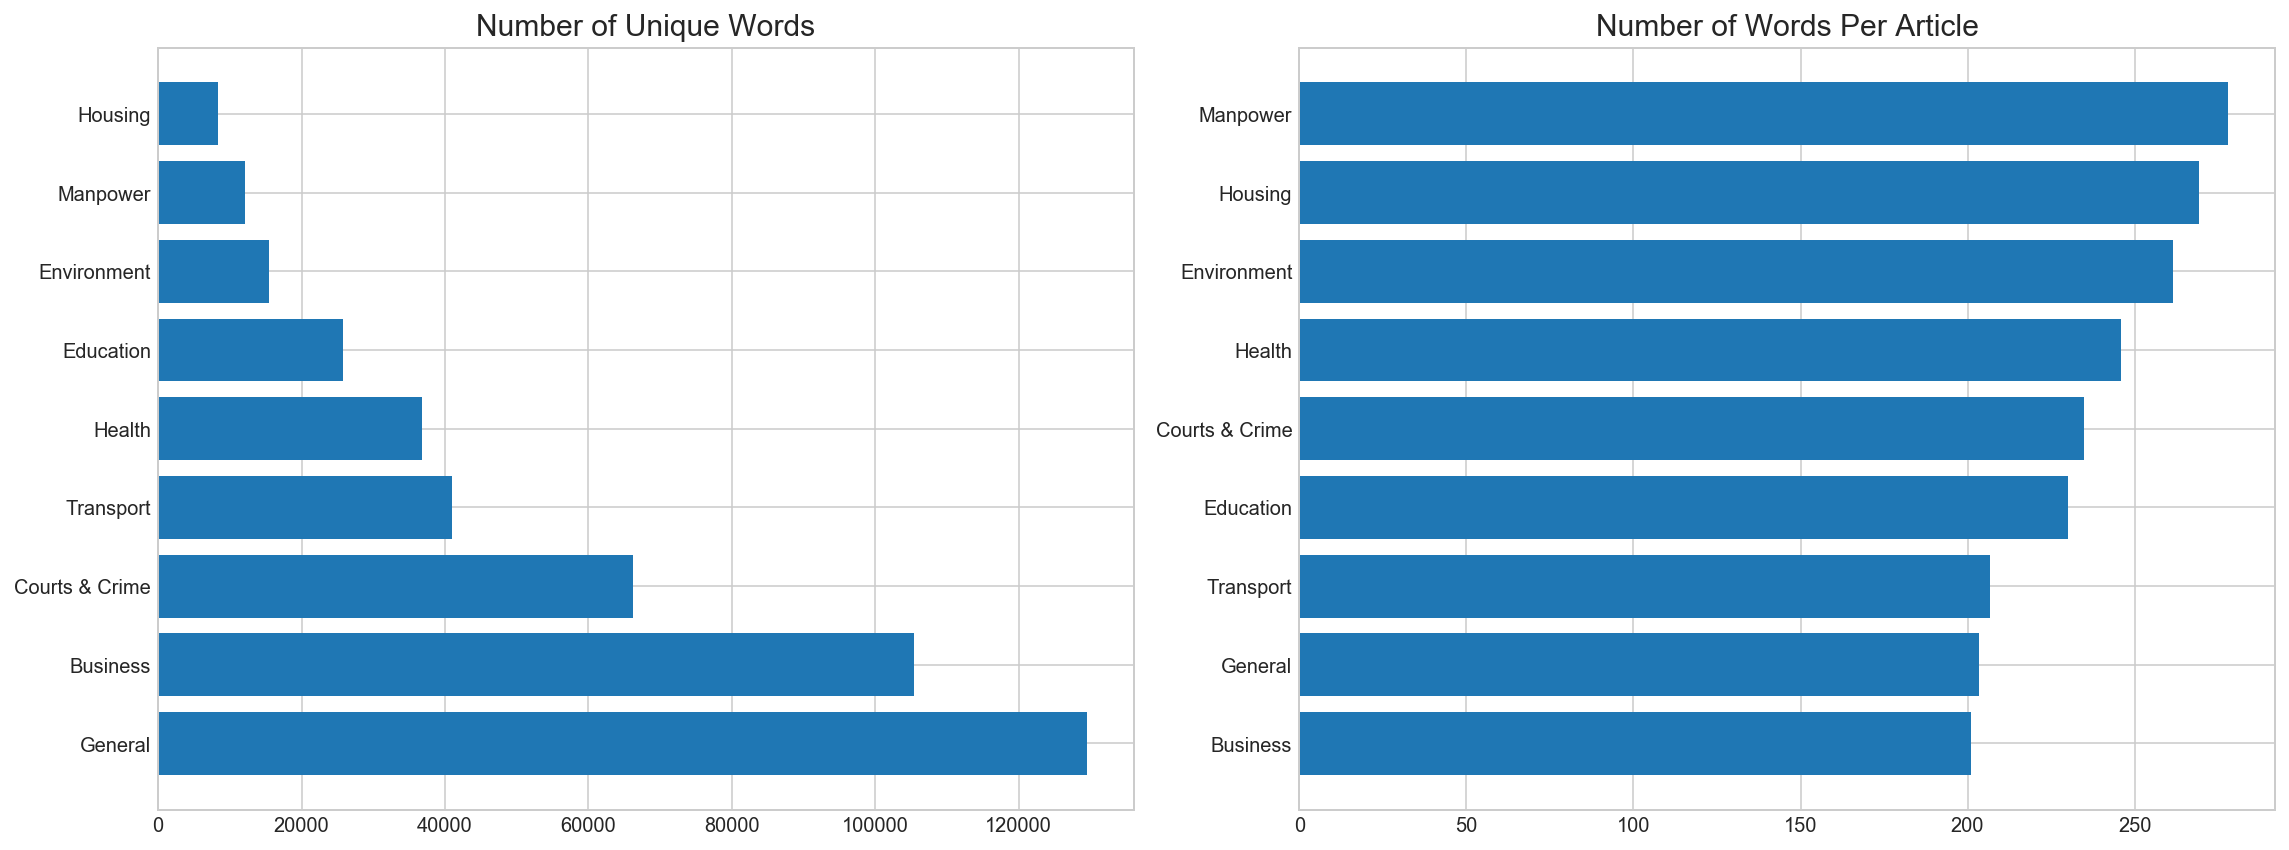

In [33]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.category)
plt.title('Number of Unique Words', fontsize=15)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpa_sort.words_per_article, align='center')
plt.yticks(y_pos, data_wpa_sort.category)
plt.title('Number of Words Per Article', fontsize=15)

plt.tight_layout()
plt.show()

### Findings
- Vocabulary
1. General contains the most unique words which is expected due to varied topics that could have covered.
2. The number of unique words decreases with total number of articles per category. With fewer articles, it is expected to have a lower vocabulary count.
- Size
1. Manpower articles have a high count of words due to its technicality
2. Business words could be constantly repeated

In [34]:
from textblob import TextBlob

df_clean


pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_clean['Polarity'] = df_clean['Content'].apply(pol)
df_clean['Subjectivity'] = df_clean['Content'].apply(sub)


In [35]:
df_clean['Categories'] = df_clean.index
df_clean

,Content,Polarity,Subjectivity,Categories
Category,,,,
Business,april saw a big pullback in launches as caut...,0.090685,0.372687,Business
Courts & Crime,three men to be the a grabhitch payment h...,0.013157,0.367751,Courts & Crime
Education,some 600 people came together over the to sm...,0.136289,0.418638,Education
Environment,a large waterspout was off singapores shores ...,0.095158,0.397101,Environment
General,all the talk about the first print exhibition ...,0.100473,0.395160,General
Health,the 23 who close contact with a nigerian man...,0.106809,0.423043,Health
Housing,home buyers can more from their central to ...,0.104378,0.376720,Housing
Manpower,worker iek saron last the khmer new year at ...,0.092449,0.401467,Manpower
Transport,by contributions from new acquisitions transp...,0.110285,0.389303,Transport


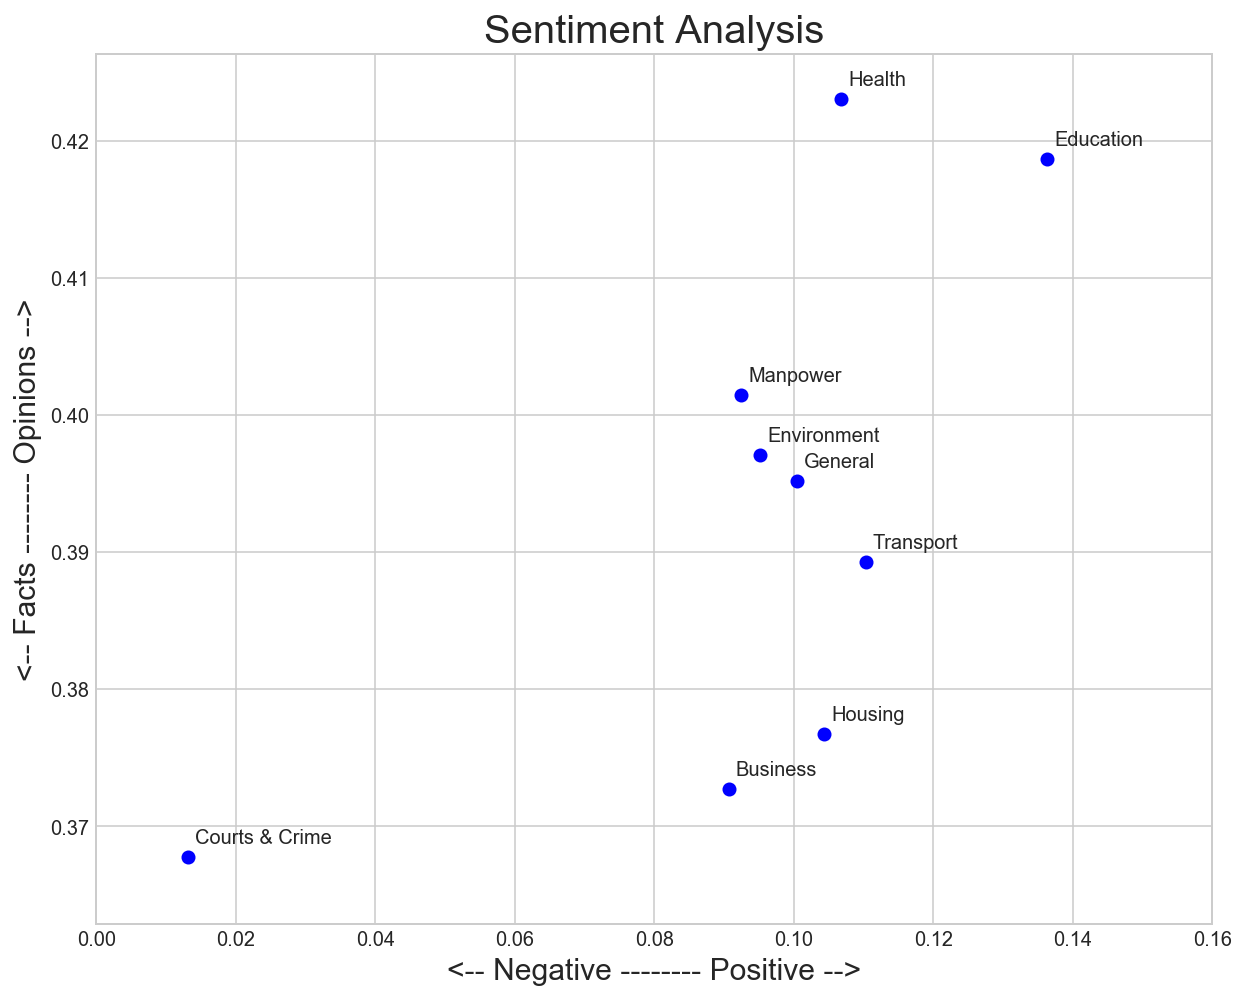

In [36]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, category in enumerate(df_clean.index):
    x = df_clean.Polarity.loc[category]
    y = df_clean.Subjectivity.loc[category]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df_clean['Categories'][index], fontsize=10)
    plt.xlim(0, .16) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Building the GloVe Text Summariser Model

In [37]:
df.head()

,Headline,Publish Date,Category,Author,Author Title,Content,Tags
0,"What else, other than Sejarah Melayu, can you ...","May 15, 2019, 4:00 am SGT",General,NaN,NaN,All the talk about The First Print exhibition ...,"['ASK NLB', 'NATIONAL LIBRARY BOARD']"
1,NUS approves plans by students' union to hold ...,"May 14, 2019, 11:50 pm SGT",General,Shabana Begum,NaN,The National University of Singapore has appro...,"['NUS', 'VOYEURS']"
2,Water management social enterprise is the firs...,"May 14, 2019, 11:15 pm SGT",General,Shabana Begum,NaN,"A local water management company, which made a...","['WATER CONSERVATION', 'AWARDS AND PRIZES']"
3,194-year-old Masjid Bencoolen to undergo $4 mi...,"May 14, 2019, 11:02 pm SGT",General,Jeanell Kiew,NaN,The 194-year-old Masjid Bencoolen will undergo...,"['MOSQUES', 'RENOVATION', 'ISLAM']"
4,ITE student scores perfect 4.0 GPA after defe...,"May 14, 2019, 10:02 pm SGT",General,Christie Chiu,NaN,In her first year at ITE College Central as a ...,"['ITE', 'LEE KUAN YEW', 'EDUCATION AND SCHOOLS..."


In [38]:
# # Taking a subset of dataframe based on category
# df_business = df.loc[df.Category == "Business"]

# df_business.reset_index(inplace=True,drop=True)

# df_business1 = df_business.drop(labels=["Category", "Publish Date", "Author", "Author Title", "Tags"],axis=1)

In [39]:
# Taking a subset of dataframe based on category

df_all = df.drop(labels=["Publish Date", "Author", "Author Title", "Tags"],axis=1)
# df_all=df

In [40]:
df_all.Content[1]

'The National University of Singapore has approved plans by its students\' union to hold night patrols on campus to further improve safety measures and deter Peeping Toms.Officials of the Office of Student Affairs and Office of Housing Services gave the NUS Students\' Union (NUSSU) the green light at a meeting on Wednesday evening (May 15), NUSSU president Benjamin Loo told The Straits Times.The patrols will be conducted during the freshmen orientation camp period that will start in June and end on the first week of August.The move is in the light of four reported cases of voyeurism on university campuses in the past three weeks, following the much-talked-about Monica Baey-Nicholas Lim issue.Mr Loo had said on Tuesday that following the 2016 NUS orientation camp saga, from 2017 onwards, freshmen had to live in campus residences and multi-purpose halls during their overnight camps."Given that students are staying in (campus), there is a higher chance of sexual misconduct cases."In 2016,

In [41]:
short_art=[]
for i,text in enumerate(df_all.Content):
    if len(text.split('.'))<8:
        print(i, text)
        print('Next article')
        short_art.append(i)

57 A 68-year-old man has been arrested for allegedly molesting a boy, said the police in a statement on Friday (May 10).On Thursday, police received a report at 2.55pm that a 10-year-old boy had been molested by an unknown man along Tampines Avenue 9.Through ground enquiries and the aid of closed-circuit television images, officers from Bedok Police Division identified the man and arrested him along Tampines Street 44 on Friday.Police are investigating the incident.Anyone convicted for outrage of modesty may be jailed for up to five years, fined, or caned, or face any combination of the punishments.
Next article
85 Hangout with ST, a video series by The Straits Times, is broadcast live at 8pm every Thursday on the paper's Facebook and YouTube pages.The series adopts a casual, talk-show format and is helmed by multimedia journalists Alyssa Woo and Hairianto Diman.In this week's episode, they will discuss the Protection from Online Falsehoods and Manipulation Act that was passed by Parli

In [42]:
len(short_art)

157

In [43]:
len(df_all)

6230

In [44]:
df_all = df_all.drop(df_all.index[short_art])

In [45]:
df_all.shape

(6073, 3)

In [46]:
import nltk
# nltk.download('stopwords') One time execution

from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

clean_articles = []
for text in df_all['Content']:
    # Regex to add a space to periods that don't already have one, but skips non-alphanumerics like commas.
    text = re.sub(r'\.(?=[^ \W\d])', '. ', text)
    # Remove weird characters
    text = text.replace(u'\xa0', u' ')
    # Make all words smaller case
    text = text.lower()
    # To remove stop words
#     pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
#     text = pattern.sub('', text)
    
    clean_articles.append(sent_tokenize(text))


# sentences = [y for x in sentences for y in x] # flatten list

In [47]:
clean_articles[1][0]

"the national university of singapore has approved plans by its students' union to hold night patrols on campus to further improve safety measures and deter peeping toms."

In [48]:
len(clean_articles)

6073

In [50]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [51]:
#  400,000 different terms stored in the dictionary – ‘word_embeddings’
len(word_embeddings)

400000

In [52]:
# Create vector for the each sentence in an article
# Vectors are fetched (each with a size of 100 elements) for words in a sentence
# The average of those vectors are consolidated to represent the sentence

article_vectors = []
for article in clean_articles:
    sentences = []
    for line in article:
        if len(line) != 0:
            v = sum([word_embeddings.get(w, np.zeros((100,))) for w in line.split()])/(len(line.split())+0.001)
        else:
            v = np.zeros((100,))
        sentences.append(v)
    article_vectors.append(sentences)

In [53]:
print(article_vectors[0][2])

[-0.1133297   0.05491607  0.24496096 -0.04380012  0.18351403  0.10912265
 -0.17515231  0.14095372 -0.31347013  0.00518038  0.13798122 -0.10272368
  0.13785013 -0.03981879  0.08830959 -0.03136781  0.18997107 -0.12947348
 -0.25804717 -0.00882291  0.1954512  -0.25766423  0.13216904  0.00467485
  0.21078885 -0.2504334   0.14001256 -0.14811177 -0.09587242 -0.03449831
 -0.1549165   0.08677851 -0.01370501  0.16973001 -0.11842731  0.12006394
  0.0746213   0.21577922 -0.17787217 -0.06553408 -0.31283846 -0.2363313
  0.07779401 -0.04873729  0.10933354  0.07507027  0.1458504  -0.1417514
 -0.15370256 -0.29614244  0.05656503  0.08843115  0.07943197  0.60599496
 -0.36753841 -1.64246809 -0.06633837 -0.26454302  1.09783347  0.39623468
 -0.31249958  0.67839731  0.03916199  0.09392929  0.39608017 -0.00648437
  0.09859047  0.06390684  0.14283373 -0.05484206 -0.08732037 -0.16759523
 -0.12815682 -0.17116409  0.07765501  0.10307788  0.01686378  0.08989689
 -0.7216337   0.0402657   0.44612316  0.04431732 -0.0

In [54]:
len(article_vectors)

6073

In [55]:
len(clean_articles)

6073

In [56]:
# similarity matrix
sim_mat = np.zeros([len(clean_articles), len(clean_articles)])

In [57]:
# sim_mat

In [58]:
# for i in clean_articles[:5]:
#     print(i)
#     print("next article")

In [59]:
df_all = df_all.reset_index(inplace=True)
df_all['Glove Summary']='test'
df_all.head()

,Headline,Category,Content,Glove Summary
0,"What else, other than Sejarah Melayu, can you ...",General,All the talk about The First Print exhibition ...,test
1,NUS approves plans by students' union to hold ...,General,The National University of Singapore has appro...,test
2,Water management social enterprise is the firs...,General,"A local water management company, which made a...",test
3,194-year-old Masjid Bencoolen to undergo $4 mi...,General,The 194-year-old Masjid Bencoolen will undergo...,test
4,ITE student scores perfect 4.0 GPA after defe...,General,In her first year at ITE College Central as a ...,test


In [60]:

for n,text in enumerate(article_vectors):
    for i in range(len(text)):
        for j in range(len(text)):
            if i != j:
                sim_mat[i][j] = cosine_similarity(article_vectors[n][i].reshape(1,100), article_vectors[n][j].reshape(1,100))[0,0]
                
    nx_graph = nx.from_numpy_array(sim_mat)
    scores = nx.pagerank(nx_graph)
    
    ranked_articles = sorted(((scores[c],s) for c,s in enumerate(clean_articles[n])), reverse=True)
#     print(ranked_articles)
    
    summary_list = []
    for r in range(round(len(ranked_articles)*0.5)):
#         print(ranked_articles[i][1].capitalize())
        summary_list.append(ranked_articles[r][1].capitalize())
    df_all['Glove Summary'][n] = summary_list
    print(n,'Index completed')

0 Index completed
1 Index completed
2 Index completed
3 Index completed
4 Index completed
5 Index completed
6 Index completed
7 Index completed
8 Index completed
9 Index completed
10 Index completed
11 Index completed
12 Index completed
13 Index completed
14 Index completed
15 Index completed
16 Index completed
17 Index completed
18 Index completed
19 Index completed
20 Index completed
21 Index completed
22 Index completed
23 Index completed
24 Index completed
25 Index completed
26 Index completed
27 Index completed
28 Index completed
29 Index completed
30 Index completed
31 Index completed
32 Index completed
33 Index completed
34 Index completed
35 Index completed
36 Index completed
37 Index completed
38 Index completed
39 Index completed
40 Index completed
41 Index completed
42 Index completed
43 Index completed
44 Index completed
45 Index completed
46 Index completed
47 Index completed
48 Index completed
49 Index completed
50 Index completed
51 Index completed
52 Index completed
53 

416 Index completed
417 Index completed
418 Index completed
419 Index completed
420 Index completed
421 Index completed
422 Index completed
423 Index completed
424 Index completed
425 Index completed
426 Index completed
427 Index completed
428 Index completed
429 Index completed
430 Index completed
431 Index completed
432 Index completed
433 Index completed
434 Index completed
435 Index completed
436 Index completed
437 Index completed
438 Index completed
439 Index completed
440 Index completed
441 Index completed
442 Index completed
443 Index completed
444 Index completed
445 Index completed
446 Index completed
447 Index completed
448 Index completed
449 Index completed
450 Index completed
451 Index completed
452 Index completed
453 Index completed
454 Index completed
455 Index completed
456 Index completed
457 Index completed
458 Index completed
459 Index completed
460 Index completed
461 Index completed
462 Index completed
463 Index completed
464 Index completed
465 Index completed


826 Index completed
827 Index completed
828 Index completed
829 Index completed
830 Index completed
831 Index completed
832 Index completed
833 Index completed
834 Index completed
835 Index completed
836 Index completed
837 Index completed
838 Index completed
839 Index completed
840 Index completed
841 Index completed
842 Index completed
843 Index completed
844 Index completed
845 Index completed
846 Index completed
847 Index completed
848 Index completed
849 Index completed
850 Index completed
851 Index completed
852 Index completed
853 Index completed
854 Index completed
855 Index completed
856 Index completed
857 Index completed
858 Index completed
859 Index completed
860 Index completed
861 Index completed
862 Index completed
863 Index completed
864 Index completed
865 Index completed
866 Index completed
867 Index completed
868 Index completed
869 Index completed
870 Index completed
871 Index completed
872 Index completed
873 Index completed
874 Index completed
875 Index completed


1225 Index completed
1226 Index completed
1227 Index completed
1228 Index completed
1229 Index completed
1230 Index completed
1231 Index completed
1232 Index completed
1233 Index completed
1234 Index completed
1235 Index completed
1236 Index completed
1237 Index completed
1238 Index completed
1239 Index completed
1240 Index completed
1241 Index completed
1242 Index completed
1243 Index completed
1244 Index completed
1245 Index completed
1246 Index completed
1247 Index completed
1248 Index completed
1249 Index completed
1250 Index completed
1251 Index completed
1252 Index completed
1253 Index completed
1254 Index completed
1255 Index completed
1256 Index completed
1257 Index completed
1258 Index completed
1259 Index completed
1260 Index completed
1261 Index completed
1262 Index completed
1263 Index completed
1264 Index completed
1265 Index completed
1266 Index completed
1267 Index completed
1268 Index completed
1269 Index completed
1270 Index completed
1271 Index completed
1272 Index co

1616 Index completed
1617 Index completed
1618 Index completed
1619 Index completed
1620 Index completed
1621 Index completed
1622 Index completed
1623 Index completed
1624 Index completed
1625 Index completed
1626 Index completed
1627 Index completed
1628 Index completed
1629 Index completed
1630 Index completed
1631 Index completed
1632 Index completed
1633 Index completed
1634 Index completed
1635 Index completed
1636 Index completed
1637 Index completed
1638 Index completed
1639 Index completed
1640 Index completed
1641 Index completed
1642 Index completed
1643 Index completed
1644 Index completed
1645 Index completed
1646 Index completed
1647 Index completed
1648 Index completed
1649 Index completed
1650 Index completed
1651 Index completed
1652 Index completed
1653 Index completed
1654 Index completed
1655 Index completed
1656 Index completed
1657 Index completed
1658 Index completed
1659 Index completed
1660 Index completed
1661 Index completed
1662 Index completed
1663 Index co

2007 Index completed
2008 Index completed
2009 Index completed
2010 Index completed
2011 Index completed
2012 Index completed
2013 Index completed
2014 Index completed
2015 Index completed
2016 Index completed
2017 Index completed
2018 Index completed
2019 Index completed
2020 Index completed
2021 Index completed
2022 Index completed
2023 Index completed
2024 Index completed
2025 Index completed
2026 Index completed
2027 Index completed
2028 Index completed
2029 Index completed
2030 Index completed
2031 Index completed
2032 Index completed
2033 Index completed
2034 Index completed
2035 Index completed
2036 Index completed
2037 Index completed
2038 Index completed
2039 Index completed
2040 Index completed
2041 Index completed
2042 Index completed
2043 Index completed
2044 Index completed
2045 Index completed
2046 Index completed
2047 Index completed
2048 Index completed
2049 Index completed
2050 Index completed
2051 Index completed
2052 Index completed
2053 Index completed
2054 Index co

2398 Index completed
2399 Index completed
2400 Index completed
2401 Index completed
2402 Index completed
2403 Index completed
2404 Index completed
2405 Index completed
2406 Index completed
2407 Index completed
2408 Index completed
2409 Index completed
2410 Index completed
2411 Index completed
2412 Index completed
2413 Index completed
2414 Index completed
2415 Index completed
2416 Index completed
2417 Index completed
2418 Index completed
2419 Index completed
2420 Index completed
2421 Index completed
2422 Index completed
2423 Index completed
2424 Index completed
2425 Index completed
2426 Index completed
2427 Index completed
2428 Index completed
2429 Index completed
2430 Index completed
2431 Index completed
2432 Index completed
2433 Index completed
2434 Index completed
2435 Index completed
2436 Index completed
2437 Index completed
2438 Index completed
2439 Index completed
2440 Index completed
2441 Index completed
2442 Index completed
2443 Index completed
2444 Index completed
2445 Index co

2789 Index completed
2790 Index completed
2791 Index completed
2792 Index completed
2793 Index completed
2794 Index completed
2795 Index completed
2796 Index completed
2797 Index completed
2798 Index completed
2799 Index completed
2800 Index completed
2801 Index completed
2802 Index completed
2803 Index completed
2804 Index completed
2805 Index completed
2806 Index completed
2807 Index completed
2808 Index completed
2809 Index completed
2810 Index completed
2811 Index completed
2812 Index completed
2813 Index completed
2814 Index completed
2815 Index completed
2816 Index completed
2817 Index completed
2818 Index completed
2819 Index completed
2820 Index completed
2821 Index completed
2822 Index completed
2823 Index completed
2824 Index completed
2825 Index completed
2826 Index completed
2827 Index completed
2828 Index completed
2829 Index completed
2830 Index completed
2831 Index completed
2832 Index completed
2833 Index completed
2834 Index completed
2835 Index completed
2836 Index co

3180 Index completed
3181 Index completed
3182 Index completed
3183 Index completed
3184 Index completed
3185 Index completed
3186 Index completed
3187 Index completed
3188 Index completed
3189 Index completed
3190 Index completed
3191 Index completed
3192 Index completed
3193 Index completed
3194 Index completed
3195 Index completed
3196 Index completed
3197 Index completed
3198 Index completed
3199 Index completed
3200 Index completed
3201 Index completed
3202 Index completed
3203 Index completed
3204 Index completed
3205 Index completed
3206 Index completed
3207 Index completed
3208 Index completed
3209 Index completed
3210 Index completed
3211 Index completed
3212 Index completed
3213 Index completed
3214 Index completed
3215 Index completed
3216 Index completed
3217 Index completed
3218 Index completed
3219 Index completed
3220 Index completed
3221 Index completed
3222 Index completed
3223 Index completed
3224 Index completed
3225 Index completed
3226 Index completed
3227 Index co

3571 Index completed
3572 Index completed
3573 Index completed
3574 Index completed
3575 Index completed
3576 Index completed
3577 Index completed
3578 Index completed
3579 Index completed
3580 Index completed
3581 Index completed
3582 Index completed
3583 Index completed
3584 Index completed
3585 Index completed
3586 Index completed
3587 Index completed
3588 Index completed
3589 Index completed
3590 Index completed
3591 Index completed
3592 Index completed
3593 Index completed
3594 Index completed
3595 Index completed
3596 Index completed
3597 Index completed
3598 Index completed
3599 Index completed
3600 Index completed
3601 Index completed
3602 Index completed
3603 Index completed
3604 Index completed
3605 Index completed
3606 Index completed
3607 Index completed
3608 Index completed
3609 Index completed
3610 Index completed
3611 Index completed
3612 Index completed
3613 Index completed
3614 Index completed
3615 Index completed
3616 Index completed
3617 Index completed
3618 Index co

3962 Index completed
3963 Index completed
3964 Index completed
3965 Index completed
3966 Index completed
3967 Index completed
3968 Index completed
3969 Index completed
3970 Index completed
3971 Index completed
3972 Index completed
3973 Index completed
3974 Index completed
3975 Index completed
3976 Index completed
3977 Index completed
3978 Index completed
3979 Index completed
3980 Index completed
3981 Index completed
3982 Index completed
3983 Index completed
3984 Index completed
3985 Index completed
3986 Index completed
3987 Index completed
3988 Index completed
3989 Index completed
3990 Index completed
3991 Index completed
3992 Index completed
3993 Index completed
3994 Index completed
3995 Index completed
3996 Index completed
3997 Index completed
3998 Index completed
3999 Index completed
4000 Index completed
4001 Index completed
4002 Index completed
4003 Index completed
4004 Index completed
4005 Index completed
4006 Index completed
4007 Index completed
4008 Index completed
4009 Index co

4353 Index completed
4354 Index completed
4355 Index completed
4356 Index completed
4357 Index completed
4358 Index completed
4359 Index completed
4360 Index completed
4361 Index completed
4362 Index completed
4363 Index completed
4364 Index completed
4365 Index completed
4366 Index completed
4367 Index completed
4368 Index completed
4369 Index completed
4370 Index completed
4371 Index completed
4372 Index completed
4373 Index completed
4374 Index completed
4375 Index completed
4376 Index completed
4377 Index completed
4378 Index completed
4379 Index completed
4380 Index completed
4381 Index completed
4382 Index completed
4383 Index completed
4384 Index completed
4385 Index completed
4386 Index completed
4387 Index completed
4388 Index completed
4389 Index completed
4390 Index completed
4391 Index completed
4392 Index completed
4393 Index completed
4394 Index completed
4395 Index completed
4396 Index completed
4397 Index completed
4398 Index completed
4399 Index completed
4400 Index co

4744 Index completed
4745 Index completed
4746 Index completed
4747 Index completed
4748 Index completed
4749 Index completed
4750 Index completed
4751 Index completed
4752 Index completed
4753 Index completed
4754 Index completed
4755 Index completed
4756 Index completed
4757 Index completed
4758 Index completed
4759 Index completed
4760 Index completed
4761 Index completed
4762 Index completed
4763 Index completed
4764 Index completed
4765 Index completed
4766 Index completed
4767 Index completed
4768 Index completed
4769 Index completed
4770 Index completed
4771 Index completed
4772 Index completed
4773 Index completed
4774 Index completed
4775 Index completed
4776 Index completed
4777 Index completed
4778 Index completed
4779 Index completed
4780 Index completed
4781 Index completed
4782 Index completed
4783 Index completed
4784 Index completed
4785 Index completed
4786 Index completed
4787 Index completed
4788 Index completed
4789 Index completed
4790 Index completed
4791 Index co

5135 Index completed
5136 Index completed
5137 Index completed
5138 Index completed
5139 Index completed
5140 Index completed
5141 Index completed
5142 Index completed
5143 Index completed
5144 Index completed
5145 Index completed
5146 Index completed
5147 Index completed
5148 Index completed
5149 Index completed
5150 Index completed
5151 Index completed
5152 Index completed
5153 Index completed
5154 Index completed
5155 Index completed
5156 Index completed
5157 Index completed
5158 Index completed
5159 Index completed
5160 Index completed
5161 Index completed
5162 Index completed
5163 Index completed
5164 Index completed
5165 Index completed
5166 Index completed
5167 Index completed
5168 Index completed
5169 Index completed
5170 Index completed
5171 Index completed
5172 Index completed
5173 Index completed
5174 Index completed
5175 Index completed
5176 Index completed
5177 Index completed
5178 Index completed
5179 Index completed
5180 Index completed
5181 Index completed
5182 Index co

5526 Index completed
5527 Index completed
5528 Index completed
5529 Index completed
5530 Index completed
5531 Index completed
5532 Index completed
5533 Index completed
5534 Index completed
5535 Index completed
5536 Index completed
5537 Index completed
5538 Index completed
5539 Index completed
5540 Index completed
5541 Index completed
5542 Index completed
5543 Index completed
5544 Index completed
5545 Index completed
5546 Index completed
5547 Index completed
5548 Index completed
5549 Index completed
5550 Index completed
5551 Index completed
5552 Index completed
5553 Index completed
5554 Index completed
5555 Index completed
5556 Index completed
5557 Index completed
5558 Index completed
5559 Index completed
5560 Index completed
5561 Index completed
5562 Index completed
5563 Index completed
5564 Index completed
5565 Index completed
5566 Index completed
5567 Index completed
5568 Index completed
5569 Index completed
5570 Index completed
5571 Index completed
5572 Index completed
5573 Index co

5917 Index completed
5918 Index completed
5919 Index completed
5920 Index completed
5921 Index completed
5922 Index completed
5923 Index completed
5924 Index completed
5925 Index completed
5926 Index completed
5927 Index completed
5928 Index completed
5929 Index completed
5930 Index completed
5931 Index completed
5932 Index completed
5933 Index completed
5934 Index completed
5935 Index completed
5936 Index completed
5937 Index completed
5938 Index completed
5939 Index completed
5940 Index completed
5941 Index completed
5942 Index completed
5943 Index completed
5944 Index completed
5945 Index completed
5946 Index completed
5947 Index completed
5948 Index completed
5949 Index completed
5950 Index completed
5951 Index completed
5952 Index completed
5953 Index completed
5954 Index completed
5955 Index completed
5956 Index completed
5957 Index completed
5958 Index completed
5959 Index completed
5960 Index completed
5961 Index completed
5962 Index completed
5963 Index completed
5964 Index co

In [61]:


for i in range(len(text)):
    for j in range(len(text)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(article_vectors[n][i].reshape(1,100), article_vectors[n][j].reshape(1,100))[0,0]

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

ranked_articles = sorted(((scores[c],s) for c,s in enumerate(clean_articles[n])), reverse=True)
#     print(ranked_articles)

summary_list = []
for r in range(round(len(ranked_articles)*0.5)):
#         print(ranked_articles[i][1].capitalize())
    summary_list.append(ranked_articles[r][1].capitalize())
df_all['Glove Summary'][n] = summary_list
print(n,'Index completed')

6072 Index completed


In [62]:
ranked_articles

[(0.0008503052696957178,
  'mohamed shalleh maintained in his statements that he was only delivering contraband cigarettes for a friend known to him as "bai", who said the delivery would offset some of the debt that mohamed shalleh owed him.'),
 (0.0008462661949753501,
  "mohamed shalleh abdul latiff's defence during a seven-day trial that concluded on jan 28 hinged on the claim that he thought the three bundles he was tasked to deliver contained contraband cigarettes."),
 (0.0008462634714247021,
  "however justice hoo picked at the defence that mohamed shalleh trusted and believed bai's word that the delivery only concerned cigarettes."),
 (0.0008460673120391015,
  'but the bundles were found to have contained 54.04g of diamorphine, also known as heroin.'),
 (0.0008447552025242552,
  'central narcotics bureau (cnb) officers tailed both men and arrested mohamed shalleh at mei ling street where he was due to deliver the goods to a third party.'),
 (0.000842896550297737,
  'when question

In [ ]:
df_all.to_csv("glove_summary.csv", encoding='utf-8')

In [ ]:
print(df_business1['Headline'][10],df_business1['Content'][10], 'END',"\n", df_business1['Summary'][10])

In [ ]:
ranked_articles = sorted(((scores[i],s) for i,s in enumerate(clean_articles[0])), reverse=True)

In [ ]:
# Extract top 10 sentences as the summary
for i in range(10):
    print(ranked_articles[i][1].capitalize())

In [ ]:
# Removing articles with fewer than 8 sentences
remove = []
for index,text in enumerate(df.Content):
    if len(text.split('.'))<8:
        print('Word count:',len(text.split(' ')))
        print('Sentence count:', len(text.split('.')))
        print(i)
        remove.append(index)
df = df.drop(remove)

In [ ]:
df = df.reset_index()

In [ ]:
# Removing the starting term for articles that have Singapore
for i,s in enumerate(df.Content):
    if s.startswith('SINGAPORE'):
        df['Content'][i] = df['Content'][i][12:]

In [ ]:
df.Content.head(10)

### SpaCy Auto Text Summary

In [ ]:
# glove = pd.read_csv("glove_summary.csv")
# df = pd.DataFrame(glove)
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
import spacy

from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [ ]:
# Build a List of Stopwords
stopwords = list(STOP_WORDS)

In [ ]:
nlp = spacy.load('en')

In [ ]:
df.shape

In [ ]:
short_art=[]
for i,text in enumerate(df.Content):
    if len(text.split('.'))<8:
        print(i,len(text.split(' ')))
        print(text)
        short_art.append(i)

In [ ]:
df_all = df.drop(df.index[short_art])

In [ ]:
df_all.head()

In [ ]:
docx = [nlp(i) for i in df_all.Content]

In [ ]:
# docx[1:3]

In [ ]:
# Tokenization of Text
all_tokens = []
for article in docx:
    mytokens = []
    mytokens = [token.text for token in article]
    all_tokens.append(mytokens)

In [ ]:
# Build Word Frequency
# word.text is tokenization in spacy
word_frequencies_all = []
for article in docx:
    word_frequencies = {}
    for word in article:
            if word.text not in stopwords:
                    if word.text not in word_frequencies.keys():
                        word_frequencies[word.text] = 1
                    else:
                        word_frequencies[word.text] += 1
    word_frequencies_all.append(word_frequencies)

In [ ]:
# Maximum Word Frequency
maximum_frequency=[]
for i in word_frequencies_all:
    maximum_frequency.append(max(i.values()))

In [ ]:
for n,article in enumerate(word_frequencies_all):
    for word,count in article.items():  
            article[word] = (count/maximum_frequency[n])

In [ ]:
# Sentence Tokens
sentence_list = []
for i in docx:
    sentence_list.append([sentence for sentence in i.sents])

In [ ]:
# Sentence Score via comparing each word with sentence
sentence_scores_all = []  
for index,article in enumerate(sentence_list):
    sentence_scores = {}
    for sent in article:  
        for word in sent:
            if word.text.lower() in word_frequencies_all[index].keys():
#                 if len(sent.text.split(' ')) < 30: To filter out lines less then 30
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies_all[index][word.text.lower()]
                else:
                    sentence_scores[sent] += word_frequencies_all[index][word.text.lower()]
    sentence_scores_all.append(sentence_scores)

In [ ]:
# Import Heapq 
from heapq import nlargest

summarized_sentences_all = []
for index, article in enumerate(sentence_scores_all):
    summarized_sentences_all.append(nlargest(5, sentence_scores_all[index], key=sentence_scores_all[index].get))

In [ ]:
summarized_sentences_all[1]

In [ ]:
len(summarized_sentences_all)

In [ ]:
for index, sent in enumerate(summarized_sentences_all):
    print(index)
    print(sent)

In [ ]:
df['SpaCy Summary'] = 'blank'
for index, sent in enumerate(summarized_sentences_all):
    df['SpaCy Summary'][index] = sent

In [ ]:
df['SpaCy Summary'][0]

In [ ]:
# List Comprehension of Sentences Converted From Spacy.span to strings
summary_all = []
for article in summarized_sentences_all:
    final_sentences = [ w.text for w in article ]
    summary = ' '.join(final_sentences)
    summary_all.append(summary)

In [ ]:
df['SpaCy Summary'] = 'blank'
for index, sent in enumerate(summary_all):
    df['SpaCy Summary'][index] = sent

### Gensim Text Summarizer as a baseline to compare GloVe and SpaCy

In [ ]:
# Importing gensim
from gensim.summarization import summarize

In [ ]:

df['gensim Summary'] = 'blank'
for index, text in enumerate(df.Content):

    text = re.sub('([.!?()])', r'\1 ', text)
    text = re.sub('\s{2,}', ' ', text)
    df['gensim Summary'][index] = summarize(text, split=True, ratio=0.5)

In [ ]:
import random

rand_set = set()
while len(rand_set) < 50:
    x = random.randint(0, 6000)
    if x not in rand_set:
        rand_set.add(x)

rand_list = list(rand_set)

In [ ]:
import pprint as pprint
for index, row in df[:4].iterrows():
    print(index, '\n', row['gensim Summary'], '\n', row['Glove Summary'], '\n', row['SpaCy Summary'])

In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df['Sentiment'] = 'blank'
for index,i in enumerate(df['gensim Summary']):
    df['Sentiment'][index] = analyzer.polarity_scores(''.join(i))['compound']

df['Subjectivity'] = 'blank'
for index,i in enumerate(df['gensim Summary']):
    df['Subjectivity'][index] = TextBlob(''.join(i)).sentiment.subjectivity
    

In [ ]:
df.to_csv('all_summaries.csv')